# Procesado Inicial

## Limpieza y procesado

Como este apartado se realizo en la primera entrega "MD005_DidacPiferrerIglesias_Agrupacion.ipynb" se colocará una celda completa que realice todas las limpieza y operaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler

C:\Users\Didac\AppData\Local\Temp\ipykernel_24288\2340674147.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("global-economy-indicators/Global Economy Indicators.csv")
#df = pd.read_csv("sample_data/Global Economy Indicators.csv")

df.columns=df.columns.str.strip()

#Vamos a crear un diccionario que nos asocie los nombre originales con los nuevos nombres abreviados
data_names = {}
for col in df.columns:
    primeras_letras = []
    for palabra in col.split():
        if palabra[0] == "(": #Aqui podemos añadir más caracteres que queramos para nuestro diccionario
            break
        else:
            if len(col.split()) > 1:
                primeras_letras.append(palabra[0])
            else:
                primeras_letras.append(palabra)

    key = ''.join(primeras_letras)
    data_names[key] = col
if len(set(data_names)) == len(data_names):
    print("Ready to create a dictionary:")
    print(data_names)
else:
    pass
    #Aquí deberíamos, en caso de que fuera necesario, separar los elementos que son iguales, y añadirles distintos valores hasta hacerlos únicos.

#definimos una función que nos permita obtener el valor del diccionario a traves del valor del diccionario
def get_key_from_value(diccionario,value):
    for k,v in diccionario.items():
        if v == value:
            return k
    return "None" #si el valor no se encuentra

#Renombramos todas las cabeceras de las columnas con los nuevos nombres
for col in df.columns:
    new_name = get_key_from_value(data_names,col)
    df.rename(columns = {col: new_name},inplace=True)

if not "None" in df.columns: print("Rename Succesfull")

#Tenemos espacios extras, por lo tanto tenemos que limpiar también estos datos
df['Country']=df['Country'].str.strip()
df['Currency']=df['Currency'].str.strip()

#Prevenir malos formatos en los numeros
for col in df.select_dtypes(['float64']):
    df[col]=pd.to_numeric(df[col])
df


Ready to create a dictionary:
{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale,

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


# Algoritmos

## Parametrización de los datos y selección del subset de datos

In [3]:

def transform_data(df,year,num_countries):
    def wp_calculation(country):
        if country in top10:
            return 1 #True
        else:
            return 0 #False
        
    df_f = df[df['Year'] >= year]

    #wsc (without some countries)
    dicc_pais = dict(zip(df_f['CountryID'], df_f['Country']))
    print(dicc_pais)
    countries_to_delete = ['China, Macao SAR','Monaco','Sint Maarten (Dutch part)','D.P.R. of Korea','Kiribati']

    #también de igual forma que en la anterior entrega una vez creado nuestro diccionario, podemos eliminar las variables categoricas Currency y Country
    df_wsc = df_f[~df_f['Country'].isin(countries_to_delete)].drop(['Cii','Country','Currency'], axis = 1)

    #Seleccionamos las 10 potencias en los últimos 6 años del dataset
    media_GDP = df_wsc.groupby('CountryID')['GDP'].mean()
    print(media_GDP.shape)
    top10 = media_GDP.nlargest(num_countries)
    #print(top10)
    df_wsc['WP'] = df_wsc['CountryID'].apply(wp_calculation)

    #creamos las llaves disponibles que tenemos que no forman parte del top10
    random.seed(42)
    key_availables = [key for key in dicc_pais.keys() if key not in top10]
    #print(key_availables)

    non_wp = random.sample(key_availables,num_countries)

    #a continuación vamos a extrer los countryID del top10 y los vamos a juntar con los otros seleccionados

    wp_keys = [key for key,val in top10.items()]

    total_wp_nonwp = non_wp + wp_keys
    total_wp_nonwp

    df_fy_final = df_wsc[df_wsc['CountryID'].isin(total_wp_nonwp)]

    #antes de realizar nada, eliminamos nuestra variable CountryID que todo y que sea numerica es un ID asignado 
    #por el dataset que solo añade ruido al dataset.
    #df_fy_final= df_fy_final.drop(['CountryID'],axis=1)
    return df_fy_final

def standarize(df):
    #Estandarizamos nuestros datos, ya que sino los valores quedán muy desproporcionados
    scaler = StandardScaler()
    scaler.fit(df)
    data_scaled = scaler.transform(df)
    df_scaled = pd.DataFrame(data_scaled, columns=[f'{i}' for i in df.columns])
    return df_scaled

#Como se han tenido que probar diferentes sets de datos, se ha creado esta celda para ir variando desde que año queríamos los datos
#y cuantos países queríamos contemplar como potencia mundial.
year = 2010 # 2000 para adelante
num_countries = 10 # 10 paises considerados potencia mundial

#Para evitarnos tener que ir limpiando las entradas de nuevo, usaremos la función que nos transformaba los datos, y los clasificaba en potencia mundial o no
#y después le quitaremos la variable WP ya que para este caso no nos interesa

n_co = len(df['CountryID'].unique()) #sabemos que despues del filtrado habrá 207, así que esocgemos la mitad de 206 que es 103, y así no tendrá problema en asignar otros 103 aleatorios. Solo estaremos excluyendo un país
print(n_co)

mydf_clean = transform_data(df,year,103)

#th = 0.7
#guardamos la variable countryID simplemente porque con el treshold se borrará
#country_df = mydf_clean['CountryID']

#high_corr = abs(mydf_clean.corr()['Population']) >= th
#high_corr_keys = [k for k, v in zip(high_corr.keys(), high_corr.values) if abs(v) >= th]
#mydf_clean_filt = mydf_clean[high_corr_keys]

#añadimos de nuevo la columna country_df al dataset, como solo hemos eliminado columnas, no hemos alterado el orden
#mydf_clean_filt['CountryID'] = country_df
resumen_rl = mydf_clean.describe()
#Como tenemos un montón de outliers, los quitaremos todos.
#Para quitarlos definimos los limites de lo que consideramos outliers, y aplicamos la formula que definen los outliers
Q1_popu = resumen_rl.loc['25%', 'Population']
Q3_popu = resumen_rl.loc['75%', 'Population']
IQR_popu = Q3_popu - Q1_popu


lim_inf_popu = Q1_popu - 1.5 * IQR_popu
lim_sup_popu = Q3_popu + 1.5 * IQR_popu

mydf_clean_filt_nO = mydf_clean[(mydf_clean['Population'] >= lim_inf_popu) & (mydf_clean['Population'] <= lim_sup_popu)]
mydf_clean_filt_nO

220
{4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: 'Myanmar', 108: 'Burundi', 112: 'Belarus', 116: 'Cambodia', 120: 'Cameroon', 124: 'Canada', 132: 'Cabo Verde', 136: 'Cayman Islands', 140: 'Central African Republic', 144: 'Sri Lanka', 148: 'Chad', 152: 'Chile', 156: 'China', 170: 'Colombia', 174: 'Comoros', 178: 'Congo', 180: 'D.R. of the Congo', 184: 'Cook Islands', 188: 'Costa Rica', 191: 'Croatia', 192: 'Cuba', 196: 'Cyprus', 203: 'Czechia', 204: 'Benin', 208: 'Denmark', 212: 'Dominica', 214: 'Dominican Republic', 218: 'Ecuador',

,CountryID,Year,Aer,Iber,Population,PcG,Ahff,C,Eogas,Fce,...,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP,WP
40,4,2010,46.452461,46.452461,28189672,522,4.543989e+09,6.242155e+08,2.686044e+09,1.698774e+10,...,5.103525e+09,9.576890e+08,1.153161e+09,4.363794e+09,1.369468e+10,1.659483e+09,1.350038e+09,1.472478e+10,1.469889e+10,0
41,4,2011,46.747008,46.747008,29249157,593,5.175623e+09,6.495823e+08,2.096071e+09,1.908625e+10,...,5.750744e+09,1.097137e+09,1.457992e+09,5.514299e+09,1.627213e+10,1.847214e+09,1.627419e+09,1.733178e+10,1.735069e+10,0
42,4,2012,50.921400,50.921400,30466479,629,5.464646e+09,6.721504e+08,2.055180e+09,1.971352e+10,...,7.005630e+09,1.060751e+09,1.456272e+09,6.079761e+09,1.777511e+10,2.130882e+09,1.971396e+09,1.916678e+10,1.913650e+10,0
43,4,2013,55.377500,55.377500,31541209,624,5.470189e+09,6.674810e+08,2.455424e+09,1.943561e+10,...,7.026277e+09,9.169207e+08,1.315378e+09,6.358588e+09,1.810244e+10,2.258929e+09,2.031874e+09,1.969026e+10,1.962180e+10,0
44,4,2014,57.247500,57.247500,32716210,598,5.372356e+09,6.822803e+08,2.772040e+09,1.939596e+10,...,6.352480e+09,8.376618e+08,1.257932e+09,6.981407e+09,1.835999e+10,2.079703e+09,1.986314e+09,1.954844e+10,1.955070e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,2017,9.519501,9.519501,17298054,1448,1.041005e+09,2.455717e+09,9.052008e+09,1.570240e+10,...,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10,0
10508,894,2018,10.458143,10.458143,17835893,1451,8.791160e+08,2.516889e+09,9.987351e+09,1.517590e+10,...,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10,0
10509,894,2019,12.889418,12.889418,18380477,1246,6.668385e+08,2.560457e+09,8.073600e+09,1.397026e+10,...,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10,0
10510,894,2020,18.344093,18.344093,18927715,928,5.391694e+08,2.661361e+09,8.474000e+09,9.633640e+09,...,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10,0


In [4]:
#sns.pairplot(mydf_clean_filt_nO, height=2,plot_kws={"alpha": 0.5}, hue='WP',palette = "tab10")

Para esta entrega, trataremos de mejorar nuestro método de clasificación DBSCAN. Debido a que se trata de un algortimo que se centra en las densidades, hemos seleccionado las Variables OA y Fce. Ya que que como se puede ver en las autocorrelaciones de años y de paises, tenemos muchos más datos que no son potencia mundial que si que lo son. Esto ha sido debido a que lo outliers que hemos quitado son con las poblaciones muy elevadas. Así pues, el primer paso será limpiar el resto de datos.

In [5]:
dif = mydf_clean_filt_nO['WP'].value_counts()[0] - mydf_clean_filt_nO['WP'].value_counts()[1] 

#balanceamos
df_clase_mayoritaria = mydf_clean_filt_nO[mydf_clean_filt_nO['WP'] == 0]
df_eliminar = df_clase_mayoritaria.sample(n=dif)
df_balanced = mydf_clean_filt_nO.drop(df_eliminar.index)
print(df_balanced['WP'].value_counts())
print(df_balanced.info())

WP
0    963
1    963
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1926 entries, 40 to 10511
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   1926 non-null   int64  
 1   Year        1926 non-null   int64  
 2   Aer         1926 non-null   float64
 3   Iber        1926 non-null   float64
 4   Population  1926 non-null   int64  
 5   PcG         1926 non-null   int64  
 6   Ahff        1926 non-null   float64
 7   C           1926 non-null   float64
 8   Eogas       1926 non-null   float64
 9   Fce         1926 non-null   float64
 10  Ggfce       1926 non-null   float64
 11  Gcf         1926 non-null   float64
 12  Gfcf        1926 non-null   float64
 13  Hce         1926 non-null   float64
 14  Iogas       1926 non-null   float64
 15  M           1926 non-null   float64
 16  MMU         1926 non-null   float64
 17  OA          1926 non-null   float64
 18  TVA         1926 non-nul

c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 500x2000 with 0 Axes>

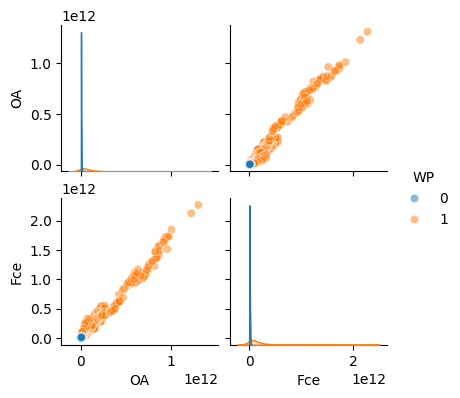

In [6]:
#Escogemos nuestras variables
twoVar = ['OA', 'Fce','WP']
mydf_clean_filt_nO = df_balanced[twoVar]

#Hacemos un primer plot para ver que forma tienen nuestros datos
plt.figure(figsize = (5, 20))
sns.pairplot(mydf_clean_filt_nO, height=2, hue='WP',plot_kws={"alpha": 0.5})
plt.show()


Vemos como la forma se parece a una exponencial

In [7]:
mydf_clean_filt_nO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1926 entries, 40 to 10511
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OA      1926 non-null   float64
 1   Fce     1926 non-null   float64
 2   WP      1926 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 60.2 KB


In [8]:
import numpy as np
import seaborn as sns
import pydot
import matplotlib.pyplot as plt
import time
from skopt import BayesSearchCV

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image


In [9]:
df_db = standarize(mydf_clean_filt_nO)

#X = df_db[['OA']]
#y = df_db[['Fce']]

### DBSCAN - sin optimizacion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Número de clústeres: 3
Estimated number of noise points: 4
Precisión: 0.4688473520249221
[[  0 963   0   0]
 [  0   0   0   0]
 [  4   0 903  56]
 [  0   0   0   0]]


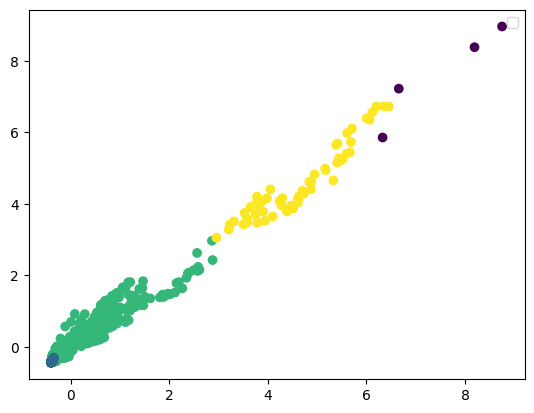

In [10]:
dbscan = DBSCAN()
dbscan.fit(df_db)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f"Número de clústeres: {n_clusters_}")
print("Estimated number of noise points: %d" % n_noise_)
print("Precisión:",accuracy_score(df_db['WP'], labels))
print(confusion_matrix(df_db['WP'], labels))
plt.scatter(df_db['OA'], df_db['Fce'], c=labels)
plt.legend()


### DBSCAN - GridSearch

In [11]:
param_grid = {
    'eps': [1000, 2000, 3000, 4000, 5000],
    'min_samples': [10, 15, 20, 30]
}

In [12]:
# Se ha comentado porque en realidad da error
# dbscan = DBSCAN()

# gscv = GridSearchCV(estimator = dbscan, param_grid = param_grid, cv = 5)
# gscv.fit(df_db)
# labels = gscv.labels_

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)
# print(f"Número de clústeres: {n_clusters_}")
# print("Estimated number of noise points: %d" % n_noise_)
# print("Precisión:",accuracy_score(df_db['WP'], labels))
# print(confusion_matrix(df_db['WP'], labels))
# plt.scatter(df_db['OA'], df_db['Fce'], c=labels)
# plt.legend()

Debido a que DBSCAN no tiene un método que devuelva score, esto no es posible, se puede hacer de otras maneras, como iterando, pero se pensaba que se podría crear una función de score para pasarla a la función de gridsearch pero no. Así pues, pasaremos a realizar clasificación con árboles de decisión.


## Árboles de decisión

In [13]:
df_ad = mydf_clean_filt_nO

print(df_ad.info())
X = df_ad.iloc[:, :-1]
y = df_ad.iloc[:, -1]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

<class 'pandas.core.frame.DataFrame'>
Index: 1926 entries, 40 to 10511
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OA      1926 non-null   float64
 1   Fce     1926 non-null   float64
 2   WP      1926 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 60.2 KB
None


### No optimizado


Time: 0.007982730865478516

With params:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1234, 'splitter': 'best'}
Accuracy: 0.96

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       184
           1       0.94      0.98      0.96       202

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



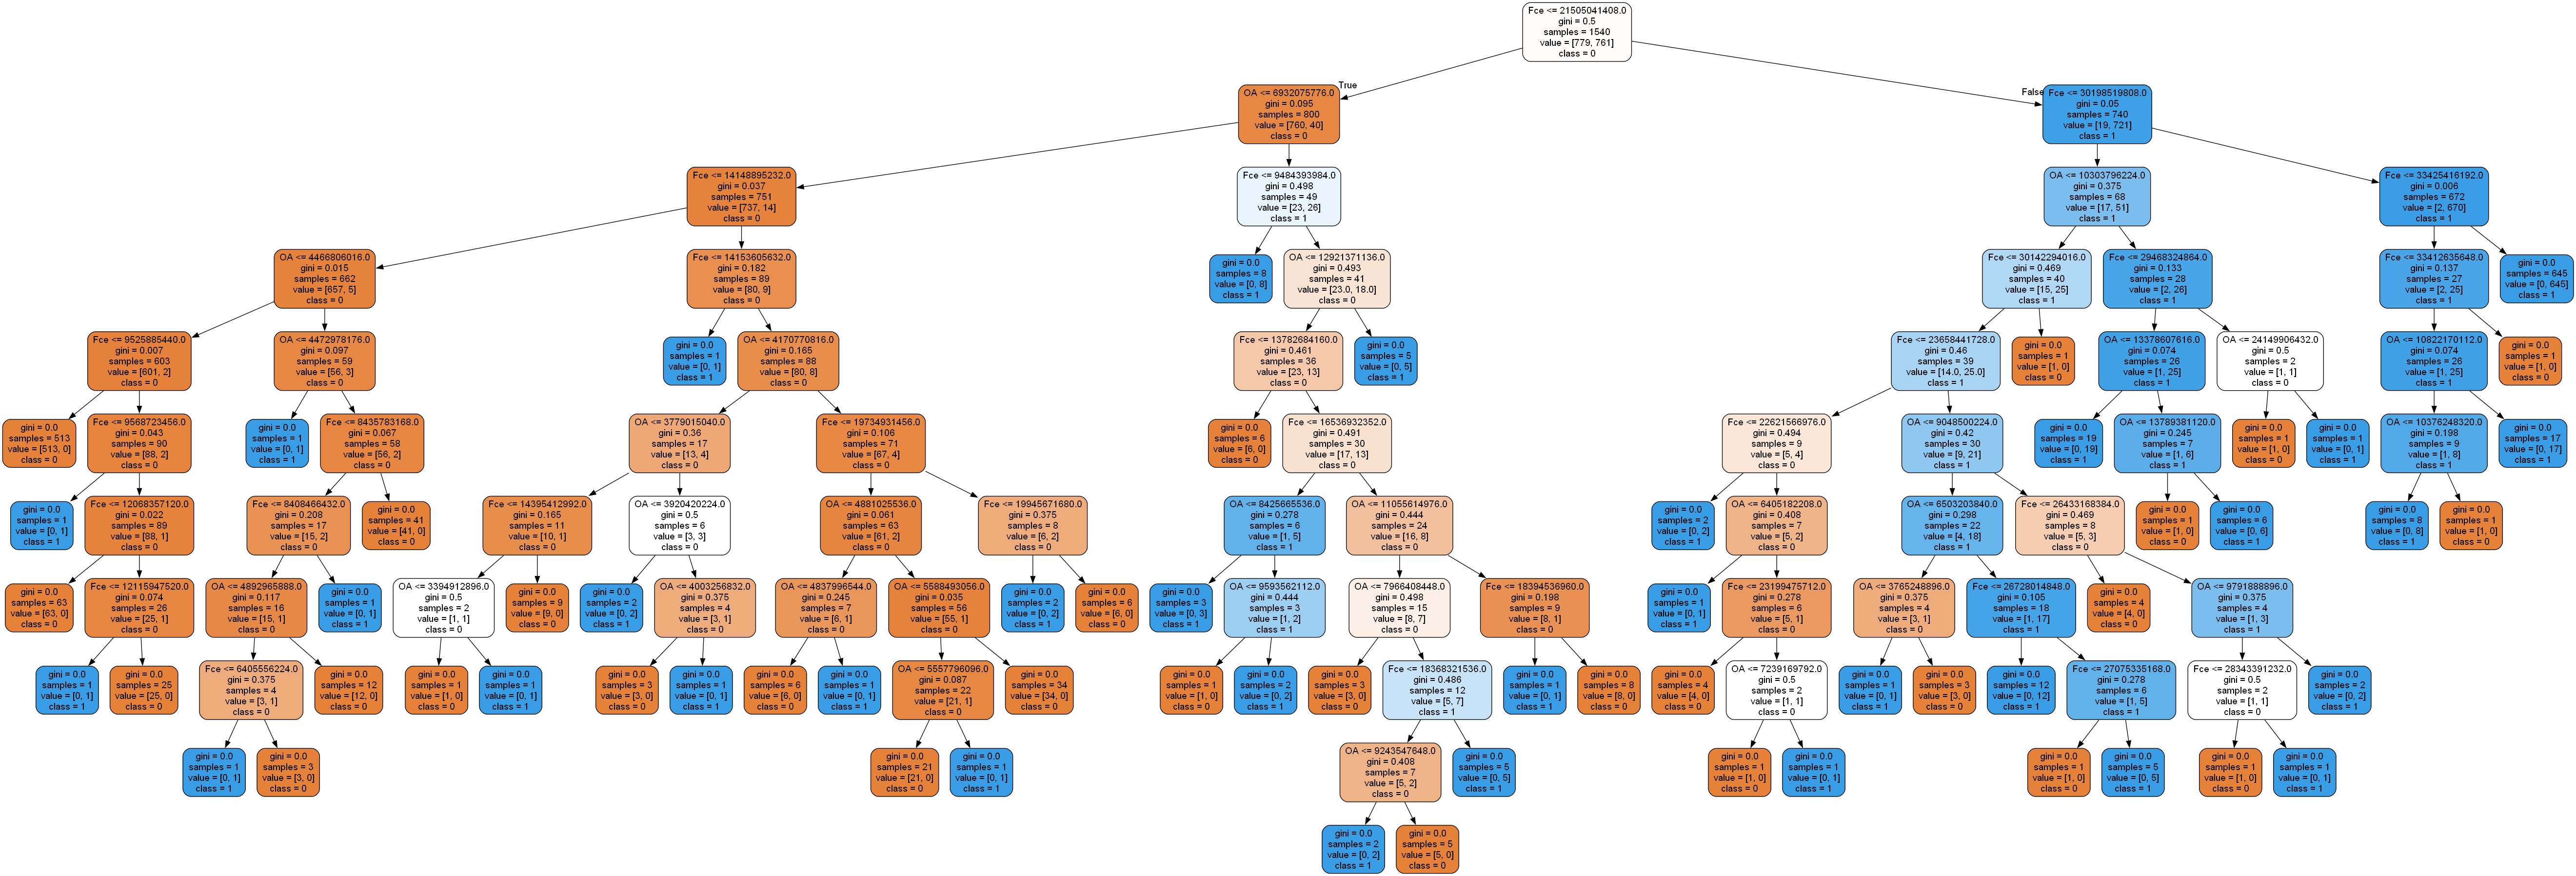

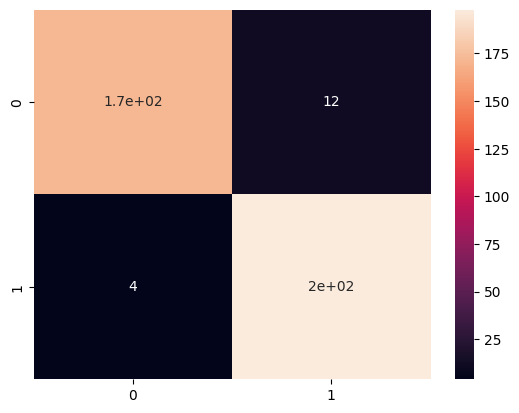

In [32]:
# Starting time
starting_time = time.time()

dt_classifier = DecisionTreeClassifier(random_state=1234)
dt_classifier.fit(X_train, y_train)

train_time = time.time()


prediction = dt_classifier.predict(X_test)
#Solo ejecutar esta celda si se tiene instalado graphviz
dot_data = StringIO()

export_graphviz(dt_classifier,out_file=dot_data,filled=True, rounded=True,  class_names = list(map(str, df_ad['WP'].unique())),
                feature_names = df_ad.columns[:-1] )

graph = pydot.graph_from_dot_data(dot_data.getvalue())

# Evaluate the model
params = dt_classifier.get_params()
accuracy = accuracy_score(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

# Print the results
print("Time: " + str((train_time - starting_time)))
print("\nWith params:")
print(params)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)



Image(graph[0].create_png())

### Grid Search

Time: 2.4614179134368896

With params:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.95

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       184
           1       0.95      0.96      0.95       202

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



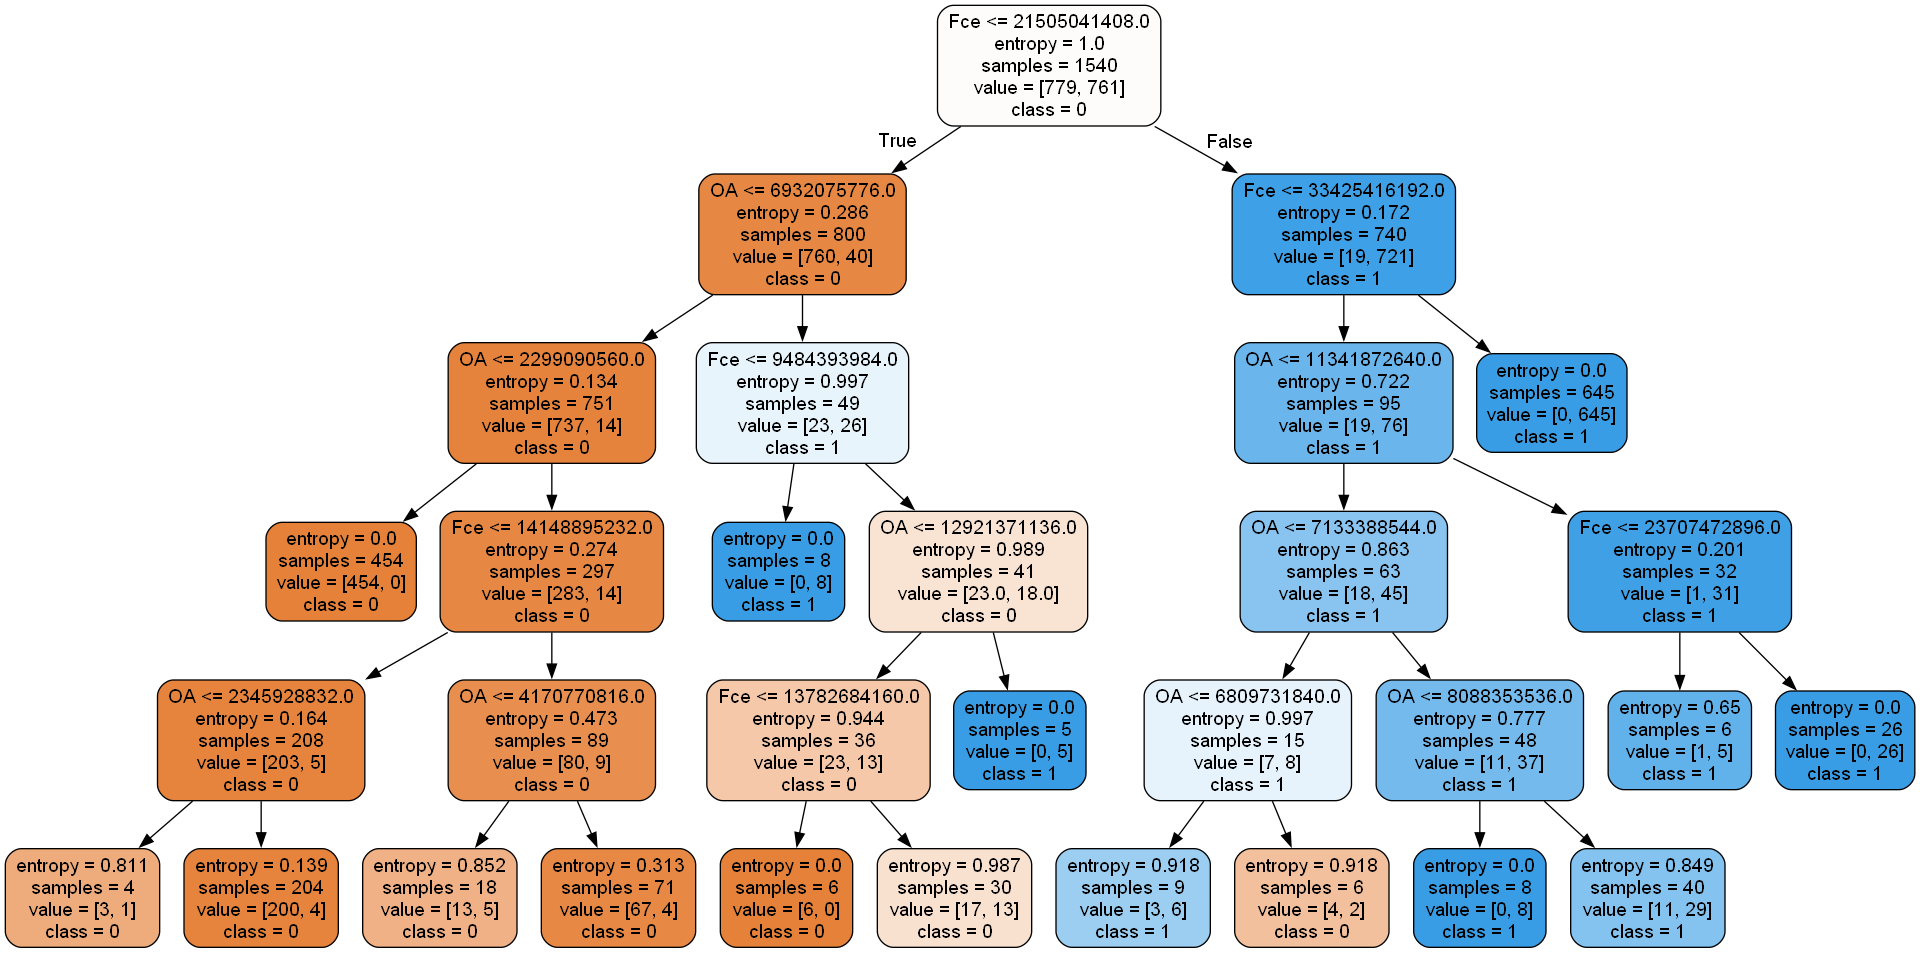

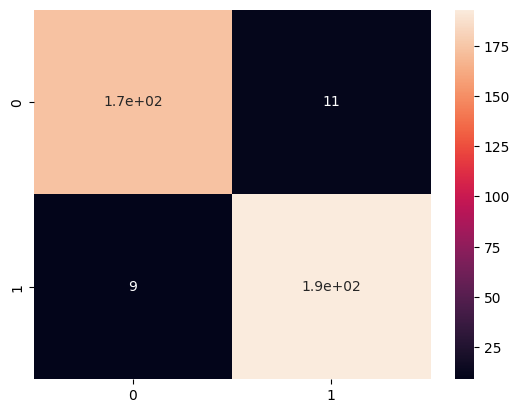

In [35]:
# Starting time
starting_time = time.time()

dt_classifier = DecisionTreeClassifier(random_state=1234)

# Define parameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier.fit(X_train, y_train)

train_time = time.time()
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
train_time = time.time()

# Evaluate the model
best_params = grid_search.best_params_

# Train a decision tree with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=1234)
best_dt_classifier.fit(X_train, y_train)

prediction = best_dt_classifier.predict(X_test)

#Solo ejecutar esta celda si se tiene instalado graphviz
dot_data = StringIO()

export_graphviz(best_dt_classifier,out_file=dot_data,filled=True, rounded=True,  class_names = list(map(str, df_ad['WP'].unique())),
                feature_names = df_ad.columns[:-1] )

graph = pydot.graph_from_dot_data(dot_data.getvalue())

accuracy = accuracy_score(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

# Print the results
print("Time: " + str((train_time - starting_time)))
print("\nWith params:")
print(best_params)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)



Image(graph[0].create_png())

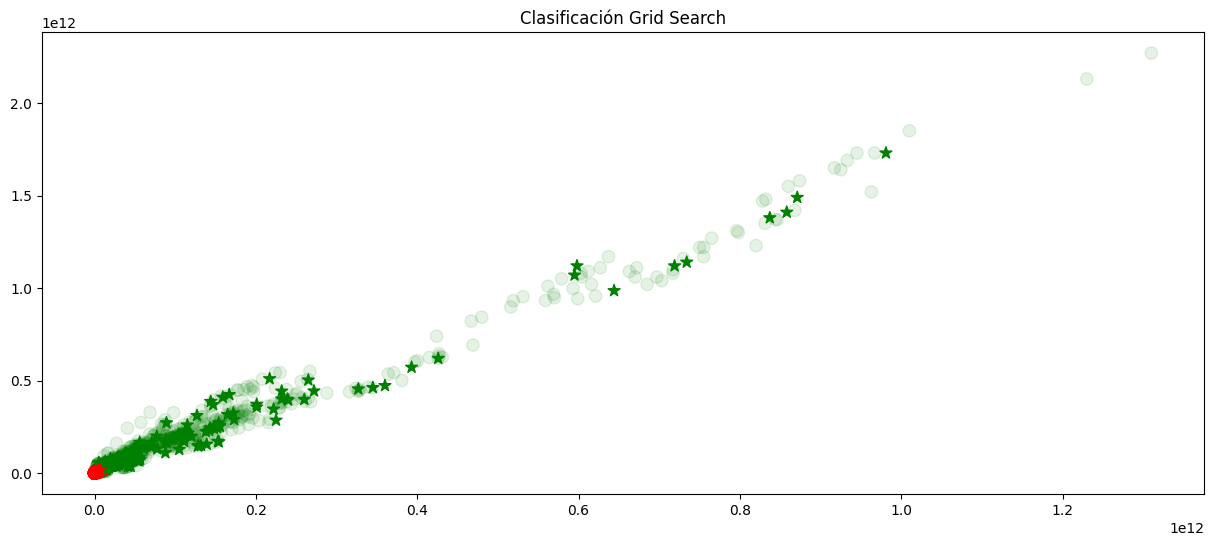

In [16]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        else:
            cols.append('green')
    return cols

cols_train = pltcolor(y_train)

#Necesario modificar el vector de predicción por la asignación aleatoria del algoritmo a las etiquetas
pred_wp = []
for index in range(0,len(prediction)):
    if prediction[index] == 0:
        pred_wp.append(0)
    elif prediction[index] == 1:
        pred_wp.append(1)
    else:
        pass

cols_vald = pltcolor(pred_wp)

plt.figure(figsize = (15, 6))
plt.title("Clasificación Grid Search")
plt.scatter(X_train['OA'], X_train['Fce'], c=cols_train, marker = "o", alpha=0.1, s = 80)
plt.scatter(X_test['OA'], X_test['Fce'], c = cols_vald, marker = "*", s = 80)

### Random Search


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
78 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

Time: 19.167160272598267

With params:
{'min_samples_split': 30, 'min_samples_leaf': 3, 'max_depth': 16, 'criterion': 'entropy'}
Accuracy: 0.96

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       184
           1       0.95      0.98      0.96       202

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



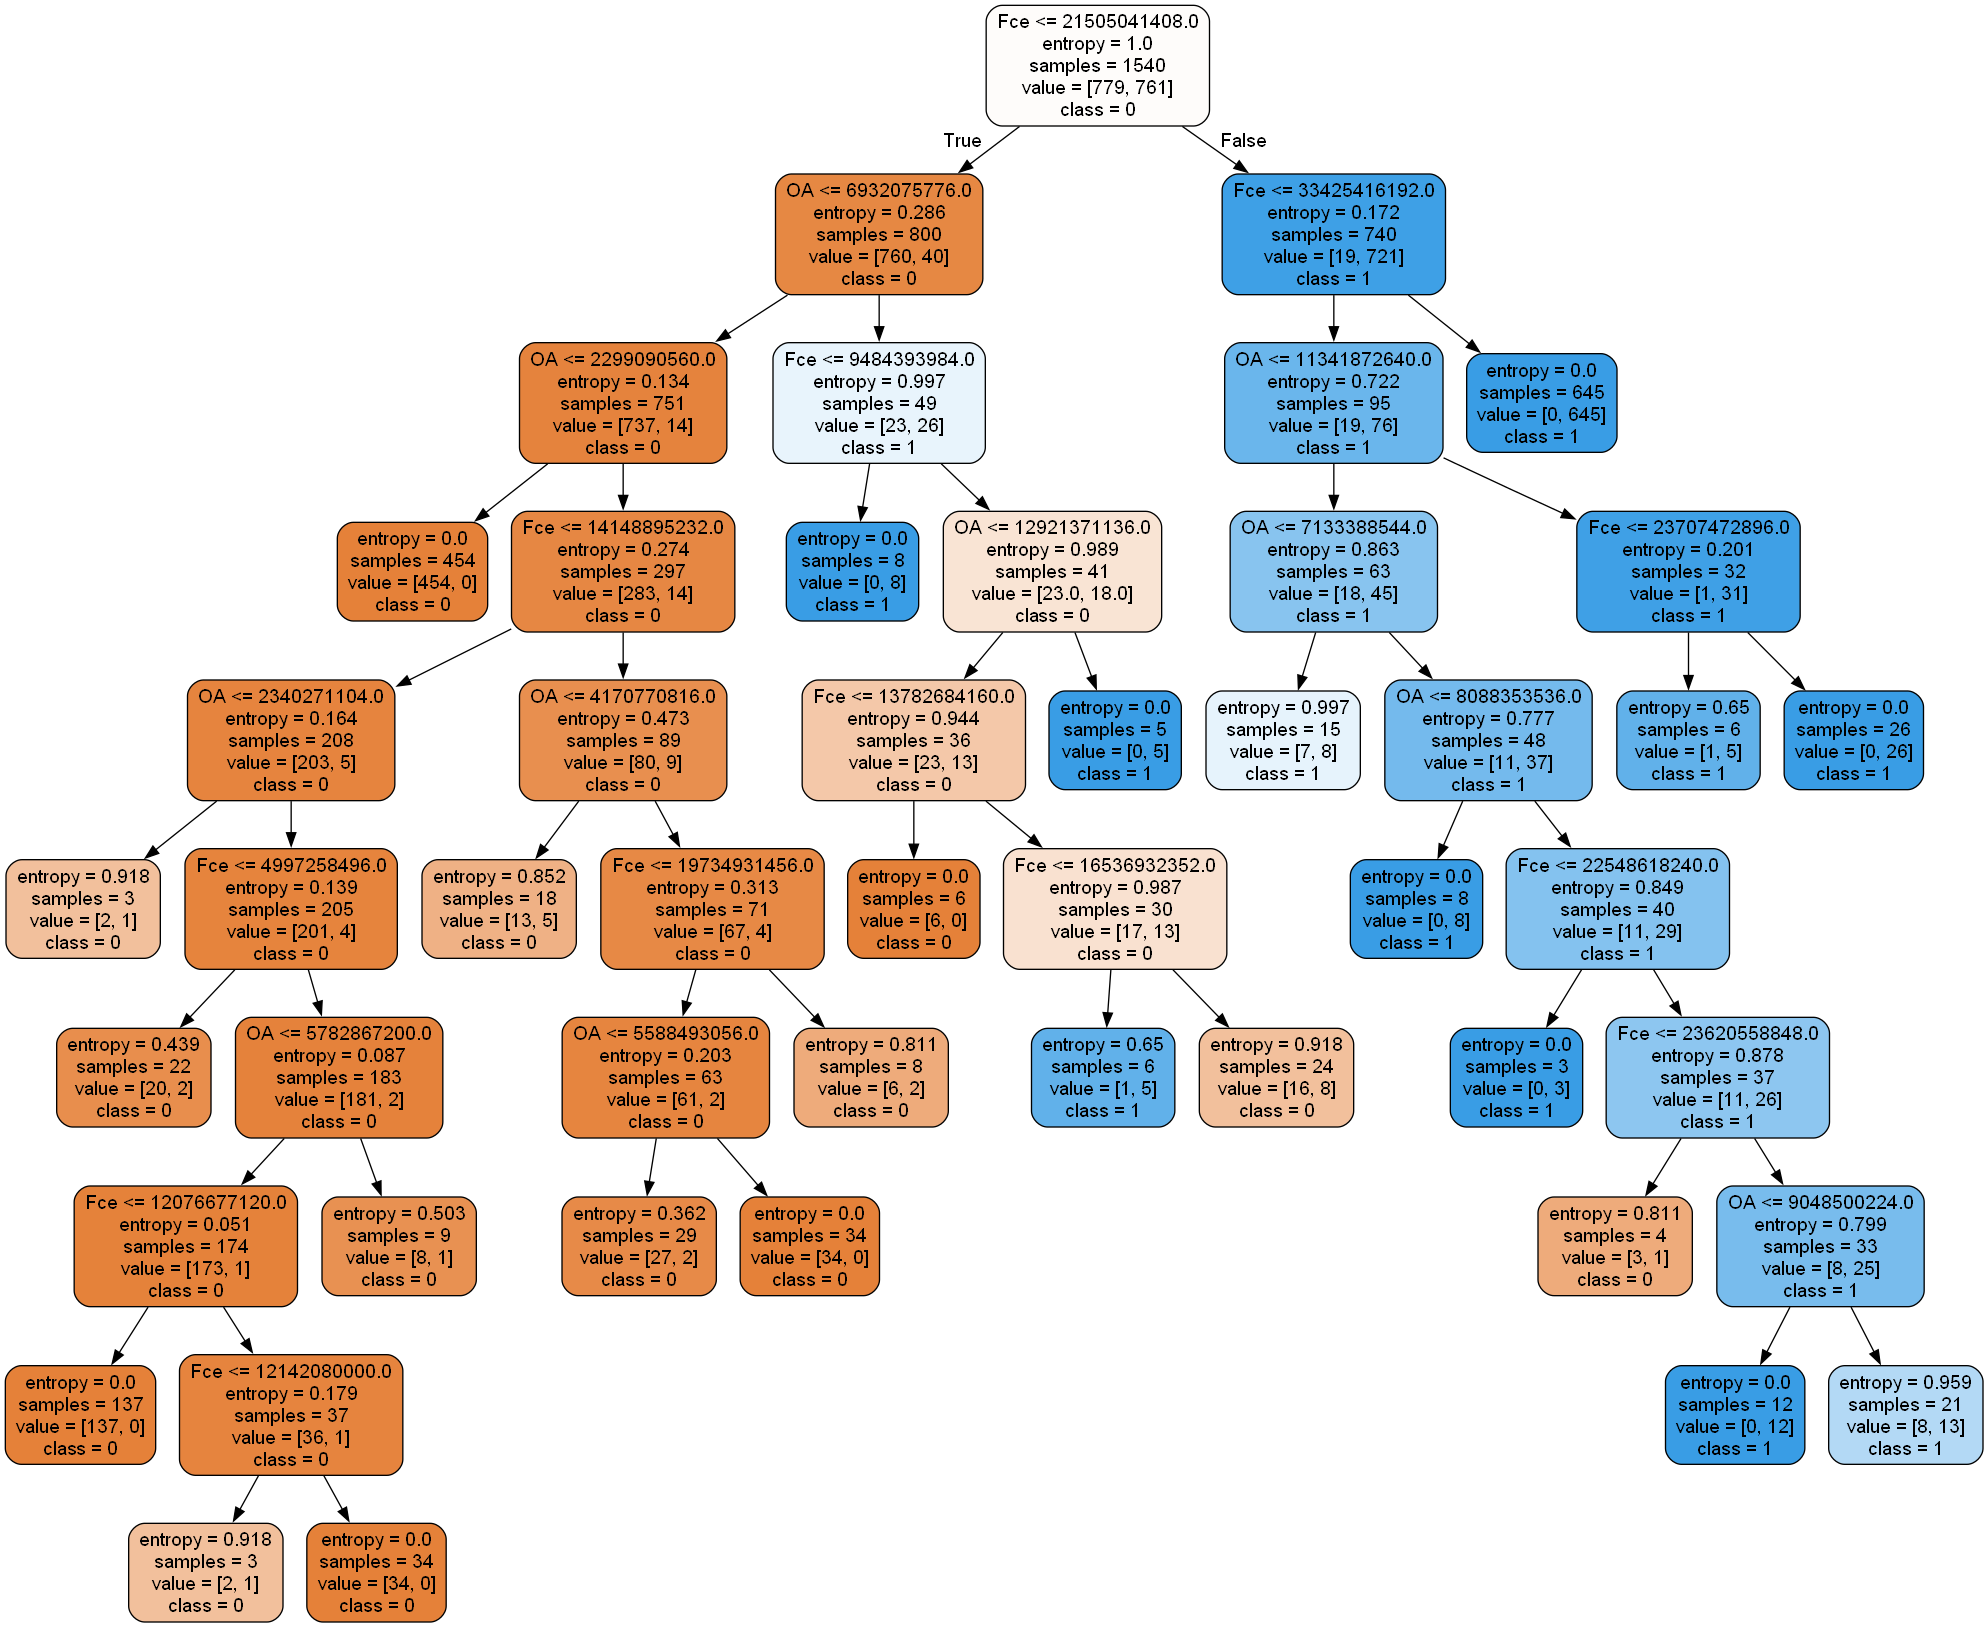

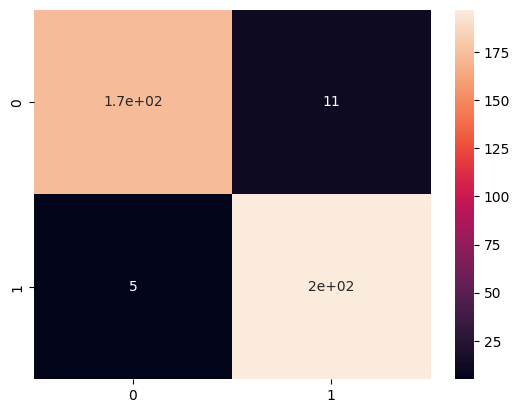

In [33]:

# Starting time
starting_time = time.time()

dt_classifier = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 100),
    'min_samples_split': np.arange(1, 50),
    'min_samples_leaf': np.arange(1, 100)
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=1000, cv=3, random_state=33)
random_search.fit(X_train, y_train)

train_time = time.time()

best_params = random_search.best_params_

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
prediction = best_dt_classifier.predict(X_test)

#Solo ejecutar esta celda si se tiene instalado graphviz
dot_data = StringIO()

export_graphviz(best_dt_classifier,out_file=dot_data,filled=True, rounded=True,  class_names = list(map(str, df_ad['WP'].unique())),
                feature_names = df_ad.columns[:-1] )

graph = pydot.graph_from_dot_data(dot_data.getvalue())

accuracy = accuracy_score(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

# Print the results
print("Time: " + str((train_time - starting_time)))
print("\nWith params:")
print(best_params)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)



Image(graph[0].create_png())

### Optimización bayesiana

In [18]:
#print(np.array(X))
#X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=0)

In [19]:

# Starting time
starting_time = time.time()

dt_classifier = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 100),
    'min_samples_split': np.arange(1, 50),
    'min_samples_leaf': np.arange(1, 100)
}

# Perform Bayesian optimization with Decision Tree
bayes_search = BayesSearchCV(dt_classifier, param_grid, n_iter=100, cv=5, n_jobs=-1)

print(X_train)
bayes_search.fit(X_train, y_train)

train_time = time.time()

best_params = bayes_search.best_params_

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
prediction = best_dt_classifier.predict(X_test)

#Solo ejecutar esta celda si se tiene instalado graphviz
dot_data = StringIO()

export_graphviz(best_dt_classifier,out_file=dot_data,filled=True, rounded=True,  class_names = list(map(str, df_ad['WP'].unique())),
                feature_names = df_ad.columns[:-1] )

graph = pydot.graph_from_dot_data(dot_data.getvalue())

accuracy = accuracy_score(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

# Print the results
print("Time: " + str((train_time - starting_time)))
print("\nWith params:")
print(best_params)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)



Image(graph[0].create_png())

                OA           Fce
1178  3.118972e+08  1.046307e+09
3898  1.623428e+09  5.262355e+09
1236  1.000426e+09  5.965375e+08
8266  1.262568e+08  4.286011e+08
9815  8.324845e+09  2.526315e+10
...            ...           ...
4627  4.875290e+09  1.368731e+10
6739  4.932336e+09  8.786992e+09
9072  1.326839e+09  3.933925e+09
3083  1.010000e+11  1.880000e+11
3794  2.575006e+10  7.408089e+10

[1540 rows x 2 columns]


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
!pip install numpy==1.19.5

     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.3 MB 7.2 MB/s eta 0:00:01
     ------- -------------------------------- 1.3/7.3 MB 16.7 MB/s eta 0:00:01
     -------------- ------------------------- 2.6/7.3 MB 18.4 MB/s eta 0:00:01
     ------------------ --------------------- 3.4/7.3 MB 18.2 MB/s eta 0:00:01
     ------------------------ --------------- 4.5/7.3 MB 19.4 MB/s eta 0:00:01
     ------------------------------- -------- 5.8/7.3 MB 20.4 MB/s eta 0:00:01
     ------------------------------------ --- 6.7/7.3 MB 20.3 MB/s eta 0:00:01
     ---------------------------------------- 7.3/7.3 MB 20.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.tom

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [202 lines of output]
      setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      setup.py:480: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
        run_build = parse_setuppy_commands()
      Cythonizing sources
      Processing numpy/random\_bounded_integers.pxd.in
      Processing numpy/random\bit_generator.pyx
      Processing numpy/random\mtrand.pyx
      Processing numpy/random\_bounded_integers.pyx.in
      Processing numpy/ra

He estado intentando arreglar el error de arriba pero no he podido. Probé también de ejecutar el código en Colab y también me daba error, y después también probé ejecutando el de clase, y también me salía el mismo error. Así que después de un rato, lo dejo así.

# Conclusiones y mejoras

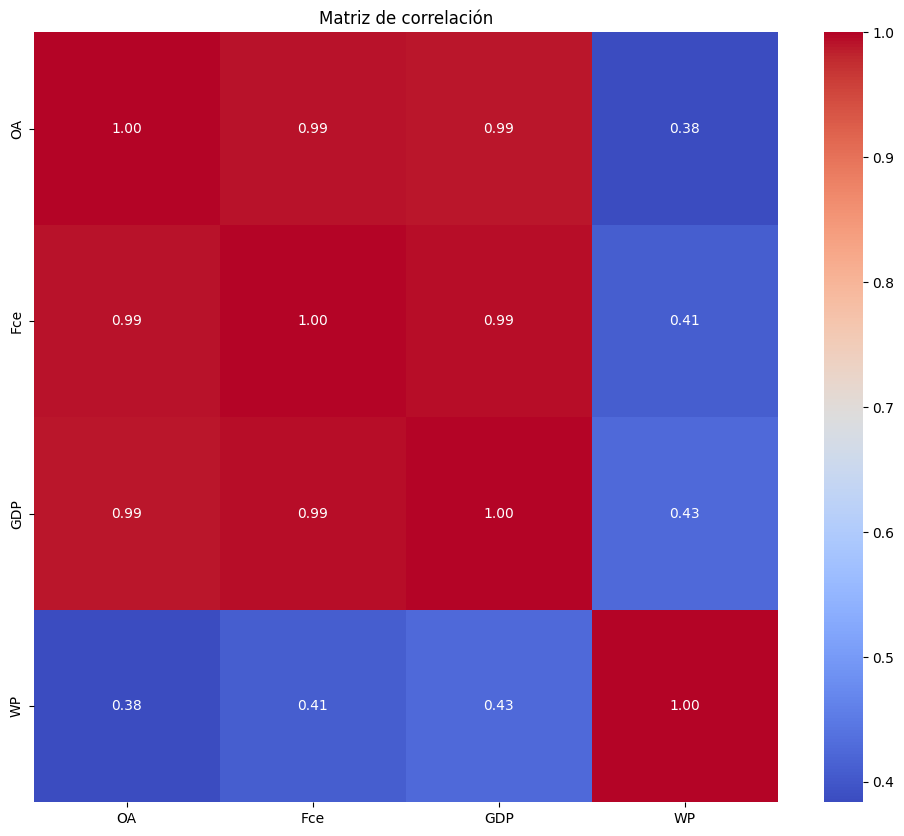

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [ ]:

#Escogemos nuestras variables
twoVar = ['OA', 'Fce','GDP', 'WP']
corr_df = df_balanced[twoVar]

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)

Dentro del problema que se ha diseñado, el resultado que ha proporcionado mejores resultados ha sido el GridSearch, puesto que con muy poco tiempo, ha llegado a conseguir esa precisón del 96%. 
Todo y que hay el mismo número de errores que con el Random Search, con el Grid search están una unidad más distribuidos, por lo que la clase que peor clasificaba con diferencia, ahora la clasifica un poco mejor.

Por otro lado, a nivel de performance el Grid Search tiene un x6.64 de speedup respeto el RandomSearch, así pues, ya por ese simple hecho, escogeríamos el Grid Search. En el caso de que el método Bayesiano hubiera aumentado al 97%, y el rendimiento hubiera empeorado mucho, para decidir que modelo usar se tendría que evaluar la situación en la que se fuera usar, y evaluar aspectos como por ejemplo la criticidad del problema y la frecuencia de uso del algoritmo.

Además, al haber segmentado los datos básicamente por el GDP, hace que el porcentaje de acierto sea muy elevado, de echo, las variables que se han escogido son OA y Fce, y tal y como se vió en la primera entrega, en respecto a todo el dataset, estas tienen un 0.98 i un 0.99 de correlación (respectivamente). Vemos, como en el nuevo dataset, esta correlación es del 0.99% en ambas, por lo cual podría parecer que habría algo más de margen de mejora, pero hay que recordar que la densidad de los puntos para la clase inferior (ya no le llamaremos potencia mundial puesto que se han cogido todos los paises y se han dividido en dos grupos) era muy superior a la de la clase superior. Por lo tanto, simplemtente que haya algunos puntos de la clase superior just o encima de algunos puntos de la clase inferior, el algoritmo será incapaz de clasificarlos correctamente (Tal y como se ha visto en la grafica de clasificación)

Por último, como mejoras, me gustaría poder en algún momento aplicar estos métodos de optimización al DBSCAN, que todo y que es un modelo de agrupación, se vio en la entrega anterior que el parámetro con el que dimos el mejor resultado fue 4000 i 12, i fue puramente casualidad, así que sería interesante ver como estos métodos afectan a la elección de los parámetros y ver también la recreación de puntos con el método bayesiano, ya que como se ha comentado anteriormente el hecho de estar relacionado por densidades, con una buena parametrización quizás se consiguen buenos resultados. 

